## Uber data Analysis with Python

<img src='capt.png' alt='Drawing' style='width: 1000px;height: 400px;'/>

###### Uber Technologies, Inc., commonly known as Uber, is an American technology company. 

Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, 
through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding Uber ride

In this tutorial, we will use Python to analyze data from Uber.

By the end of this lesson, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:

1. Check how long do people travel with Uber?
2. What Hour Do Most People Take Uber To Their Destination?
3. Check The Purpose Of Trips
4. Which Day Has The Highest Number Of Trips
5. What Are The Number Of Trips Per Each Day?
6. What Are The Trips In The Month
7. The starting points of trips. Where Do People Start Boarding Their Trip From Most?
8. The dataset for this project is loaded at the resource session of this course.

You can also request access to your personal Uber

###### let's import necessary package

In [24]:
import pandas as ps
import numpy as ny
import matplotlib as m
import matplotlib.pyplot as mp
import seaborn as sn
import datetime
import calendar
%matplotlib inline

In [4]:
#importons la base de donnée de UBER
uber=ps.read_csv('Uber Drives - .csv')
uber.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


##### Le tableau ci-dessus affiche les 10 prémières lignes de la base Uber

In [5]:
uber.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


###### Le tableau ci-dessus affiche les 10 dernières lignes de la base Uber

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


###### uber.info() permet d'afficher les types de chaque variables

In [7]:
uber.isna()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [8]:
uber.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Vu qu'il y'a des valeurs manquantes, nous allons procedé a la supression.

In [9]:
uber = uber.dropna()

In [10]:
uber.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

On remarque qu'après suppression in n'ya plus de valeurs manquantes

In [11]:
uber.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting


In [12]:
uber.rename(columns={'START_DATE*':'Start_Date', 'END_DATE*':'End_Date', 'CATEGORY*':'Cathegory','START*':'Start','STOP*':'Stop','MILES*':'Miles','PURPOSE*':'Purpose'},inplace=True)



In [13]:
uber.head(5)

,Start_Date,End_Date,Cathegory,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [21]:
uber.iloc[[1155]]

,Start_Date,End_Date,Cathegory,Start,Stop,Miles,Purpose
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [22]:
uber.drop([1155], axis=0, inplace=True)

In [15]:
uber['Start_Date']=ps.to_datetime(uber['Start_Date'], format='%m/%d/%Y %H:%M')
uber['End_Date']=ps.to_datetime(uber['End_Date'], format='%m/%d/%Y %H:%M')

In [16]:
uber.head()

,Start_Date,End_Date,Cathegory,Start,Stop,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


Céeons des nouvelles variables à partir d'autre variables

In [17]:
uber['Hour']= [x.hour for x in uber['Start_Date']]
uber['Day']=[x.day for x in uber['Start_Date']]
uber['Month']=[x.month for x in uber['Start_Date']]
uber['Weekday']=[calendar.day_name[x.dayofweek] for x in uber['Start_Date']]
uber['Day_Of_Week']=[x.dayofweek for x in uber['Start_Date']]

Affichons le tableaux avec les nouvelles variables

In [69]:
uber.head(10)

,Start_Date,End_Date,Cathegory,Start,Stop,Miles,Purpose,Hour,Day,Month,Weekday,Day_Of_Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,17,6,1,Wednesday,2
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,13,7,1,Thursday,3
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,8,10,1,Sunday,6
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,12,10,1,Sunday,6
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,15,10,1,Sunday,6


### Analysis

Affichons les catégories

In [19]:
uber['Cathegory'].value_counts()

Cathegory
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='Cathegory', ylabel='count'>

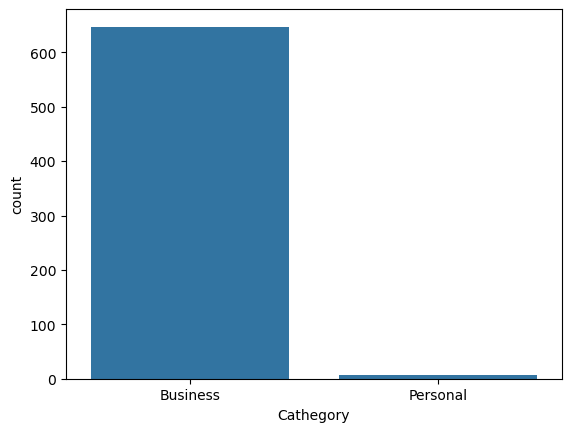

In [25]:
sn.countplot(x='Cathegory', data= uber)

On remarque que les classes Busness sont les plus nombreux

<Axes: xlabel='count', ylabel='Purpose'>

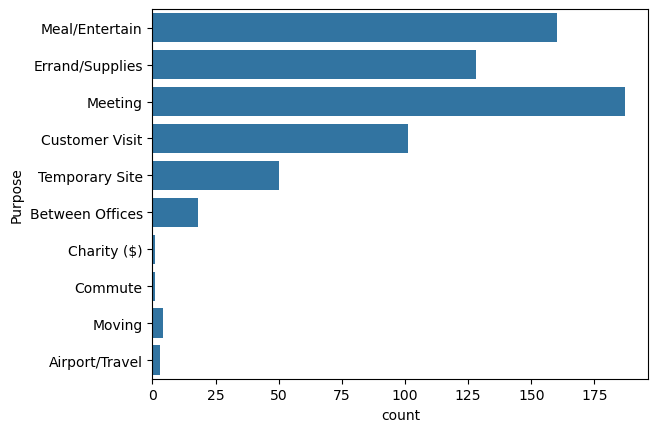

In [38]:
sn.countplot(y='Purpose', data=uber)

### 1. How long people travel with Uber

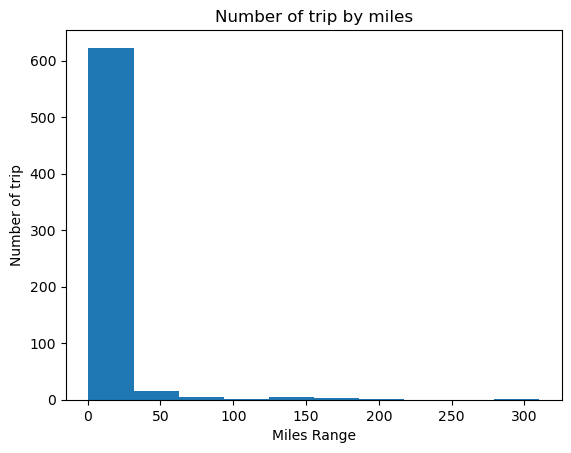

In [78]:
uber['Miles'].plot.hist()
mp.xlabel("Miles Range")
mp.ylabel('Number of trip')
mp.title('Number of trip by miles')
mp.show()

On remarque que plus de personne voyage sur une petite distance avec Uber

### 2. What Hour Do Most People Take Uber To Their Destination?

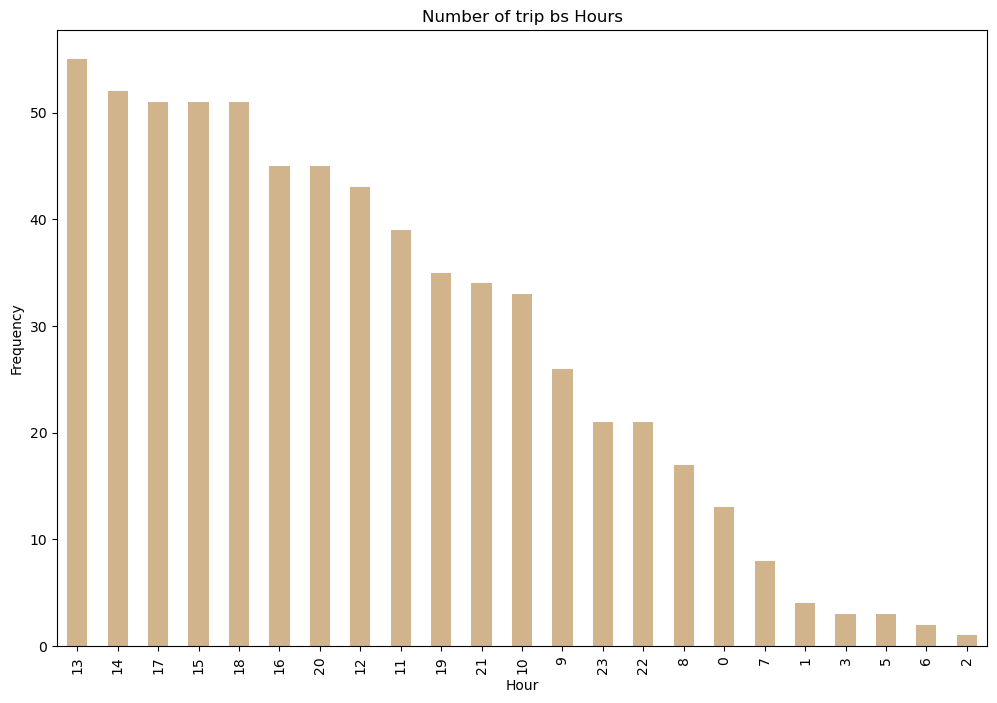

In [80]:
Hours=uber['Start_Date'].dt.hour.value_counts()
Hours.plot(kind='bar', color='tan', figsize=(12,8))
mp.xlabel('Hour')
mp.ylabel('Frequency')
mp.title('Number of trip bs Hours')
mp.show()



More than 50% of people take Uber to their destination around $13^{th}$ hours (pm)

### 3. Check The Purpose Of Trips

<Axes: xlabel='Purpose'>

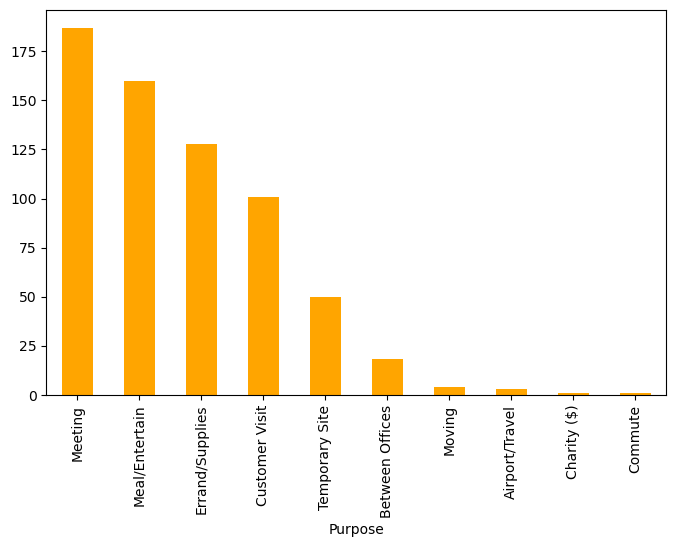

In [87]:
uber['Purpose'].value_counts().plot(kind='bar', color='orange', figsize=(8,5))

Most trip purpose is for meeting and less purpose is for commute

In [68]:
uber['Purpose'].value_counts()

Purpose
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

### 4. Which Day Has The Highest Number Of Trips

<Axes: xlabel='Weekday'>

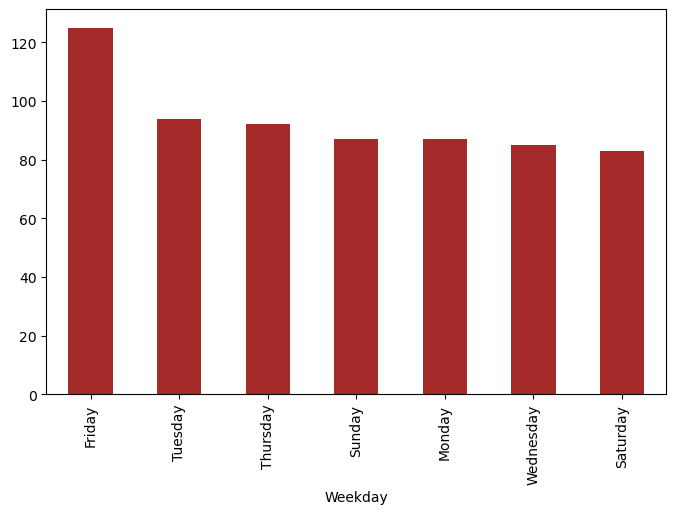

In [85]:
uber['Weekday'].value_counts().plot(kind='bar', color='brown', figsize=(8,5))

Friday has The Highest Number Of Trips

In [73]:
uber['Weekday'].value_counts()

Weekday
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

### 5. What Are The Number Of Trips Per Each Day?

<Axes: xlabel='Day'>

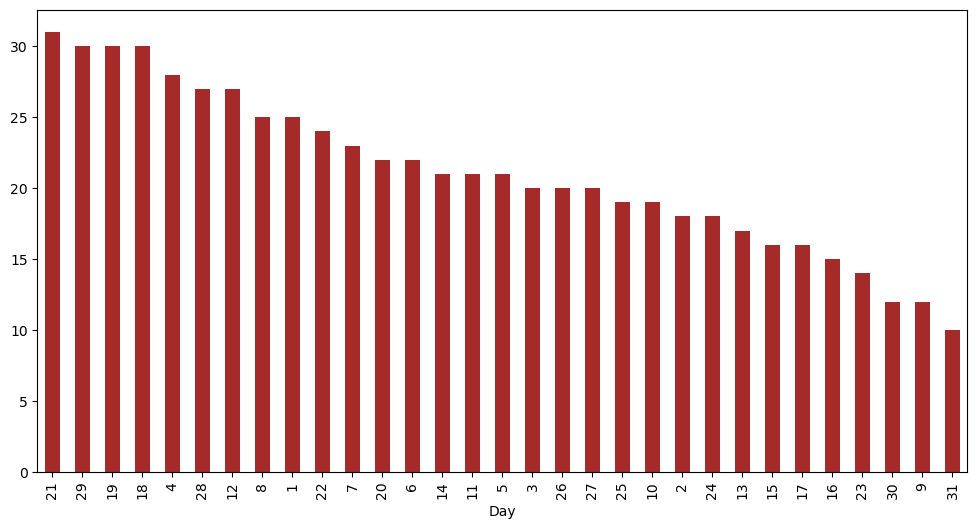

In [86]:
uber['Day'].value_counts().plot(kind='bar', color='brown', figsize=(12,6))

we notice that the 21st had more trip

###  6. What Are The Trips In The Month

In [82]:
uber.head(3)

,Start_Date,End_Date,Cathegory,Start,Stop,Miles,Purpose,Hour,Day,Month,Weekday,Day_Of_Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1


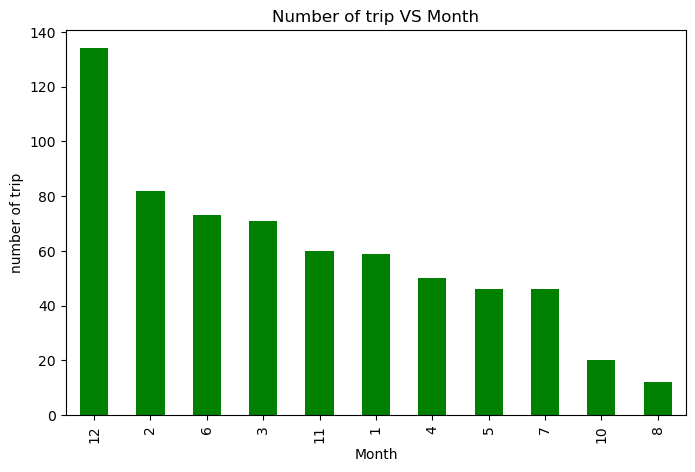

In [97]:
uber['Month'].value_counts().plot(kind='bar', color='green', figsize=(8,5))
mp.xlabel('Month')
mp.ylabel('number of trip')
mp.title('Number of trip VS Month')
mp.show()

We notice that we have more trip in December 

### 7. The starting points of trips. Where Do People Start Boarding Their Trip From Most?

<Axes: xlabel='Start'>

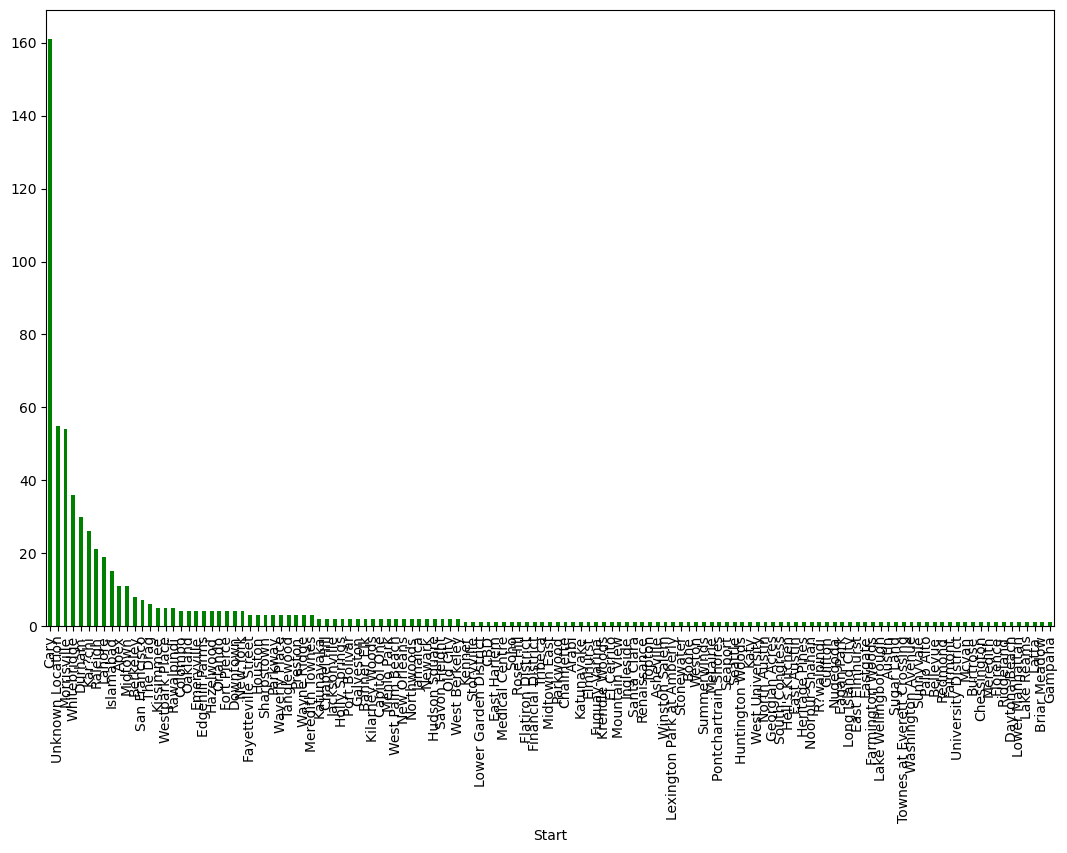

In [101]:
uber['Start'].value_counts().plot(kind='bar', color='green', figsize=(13,8))

Most people start their journey from Cary followed from unknown location